In [1]:
%load_ext autoreload
%autoreload 2

import optax
import numpy as np
import jax.numpy as jnp
import jax.random as jrandom
import matplotlib.pyplot as plt

from kink import get_state_sequence, get_zs
from training import fit
from constants import RAND_KEY

### Kink function states

In [9]:
start_state = jnp.array([2.])
V0 = 0.00001
trans_noise = 0.01
obs_noise = 0.001

num_steps = 10
N = 100

zs, xs = get_state_sequence(start_state, V0, trans_noise, obs_noise, num_steps, N)

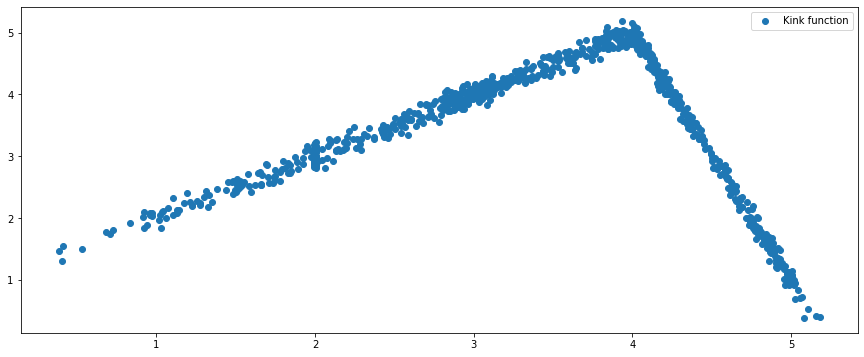

In [10]:
plt.figure(figsize=(15, 6))
plt.scatter(zs[:-1, :], zs[1:, :], label="Kink function")
plt.legend()
plt.show()

### Learn kink dynamics

In [19]:
V0 = 0.00001
trans_noise = 0.3
obs_noise = 0.1

num_steps = 7
N = 1000
NUM_TRAINING_STEPS = 5000
LR_ESTIMATOR = False

start_state = jnp.array([2.])
zs, xs = get_state_sequence(start_state, V0, trans_noise, obs_noise, num_steps, N)

num_features = 4

start_weights = jnp.full((num_features,), 0.)
# start_weights = jnp.array([1.3, 1.3, 0., 0.])
params = jnp.array([start_weights])


optimizer = optax.chain(
    optax.adam(learning_rate=0.001),
    optax.scale(-1.0)
)

optimizer.init(params)

learned_params, training_objectives, gradients = fit(
    params=params,
    optimizer=optimizer,
    training_steps=NUM_TRAINING_STEPS,
    num_features=num_features,
    start_state=start_state,
    V0=V0, 
    trans_noise=trans_noise,
    obs_noise=obs_noise,
    xs=zs,
    num_steps=num_steps,
    N=N,
    lr_estimator=LR_ESTIMATOR,
)

Step 0, ELBO: [-376.36395], grads: [187.09465   60.743477 165.92781  239.35056 ], A - [0.00099999 0.00099999 0.00099999 0.00099999]
Step 500, ELBO: [-333.8447], grads: [203.2325  126.67039 230.62506 365.94742], A - [0.0525745  0.06036832 0.05573617 0.05696587]
Step 1000, ELBO: [-337.52], grads: [203.55139  122.730644 226.82639  357.89236 ], A - [0.05257439 0.06036821 0.05573604 0.05696574]
Step 1500, ELBO: [-337.28964], grads: [203.81657 122.71024 229.06335 362.79248], A - [0.05257439 0.06036821 0.05573604 0.05696574]
Step 2000, ELBO: [-337.80945], grads: [204.44179 126.64912 234.96149 377.1104 ], A - [0.05257433 0.06036815 0.05573598 0.05696567]
Step 2500, ELBO: [-335.31772], grads: [204.31937 125.44957 232.28459 368.5183 ], A - [0.05257433 0.06036815 0.05573598 0.05696567]
Step 3000, ELBO: [-337.79877], grads: [203.96797 122.81193 226.58826 358.00357], A - [0.05257433 0.06036815 0.05573598 0.05696567]
Step 3500, ELBO: [-352.7405], grads: [196.51353  96.29421 190.70595 289.81607], A -

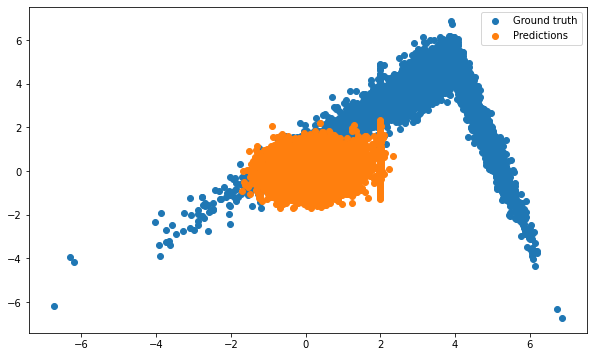

In [20]:
epsilons = jrandom.normal(key=RAND_KEY, shape=(num_steps, N, 2))
pred_zs = get_zs(learned_params[0], start_state, V0, trans_noise, epsilons)

plt.figure(figsize=(10, 6))
# plt.scatter(pred_zs[:-1, :, 1], pred_zs[1:, :, 1], label="State sequence prediction")
# plt.scatter(cos_sin_zs[:-1, :, 1], cos_sin_zs[1:, :, 1], label="Ground truth")
plt.scatter(zs[:-1], zs[1:], label="Ground truth")
plt.scatter(pred_zs[:-1], pred_zs[1:], label="Predictions")
plt.legend()
plt.show()